<a href="https://colab.research.google.com/github/serinss/seSAC_Python_Class/blob/main/%ED%86%B5%EA%B3%84%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%88%98%ED%95%99_%EC%A4%91%EC%8B%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#통계
평균, 중간값, 사분위값, 최빈값, 분산, 표준편차

In [1]:
import numpy as np
import pandas as pd

In [2]:
heights = np.random.normal(161.4,7,200) #정규 분포를 갖는 랜덤한 데이터 발생(평균:161.4, 표준편차:7, 개수:200)
bmi = np.random.normal(21,1,200) #체질량 지수
weights = bmi*(heights**2)/10000 #몸무게

In [5]:
print("=== 키 ===")
print("평균:",heights.mean())
print("중간값:",np.median(heights))
print("1/4분위값:",np.quantile(heights,0.25))
print("1/2분위값:",np.quantile(heights,0.55))
print("3/4분위값:",np.quantile(heights,0.75))
hist,_ = np.histogram(heights,bins=[x for x in range(0,250,5)]) #반환값: 히스토그램, bins
mi = hist.argmax() #최댓값이 있는 인덱스
print("최빈구간:",mi*5+0.25)

=== 키 ===
평균: 161.86964307537986
중간값: 161.65237218681688
1/4분위값: 156.22598652139186
1/2분위값: 162.99722303818857
3/4분위값: 167.3109844322416
최빈구간: 165.25


#공분산
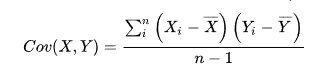

In [6]:
cv = np.cov(heights,weights)
print(cv)
print("공분산(키,키)",cv[0,0])
print("공분산(키,몸무게)",cv[0,1])
print("공분산(몸무게,키)",cv[1,0])
print("공분산(몸무게,몸무게)",cv[1,1])

[[57.16390421 39.98396349]
 [39.98396349 34.32274011]]
공분산(키,키) 57.163904209472676
공분산(키,몸무게) 39.98396349099023
공분산(몸무게,키) 39.98396349099023
공분산(몸무게,몸무게) 34.32274011387054


# 상관관계

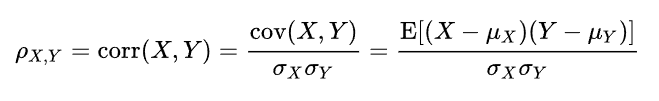

In [7]:
import pandas as pd
se_he = pd.Series(heights)
se_we = pd.Series(weights)
print(se_he.corr(se_we))

0.902680217489883
